<a href="https://colab.research.google.com/github/touseef30/pretrained_vgg16/blob/main/Pretrained_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%pwd
%ls

sample_data/


In [2]:
import numpy as np
from tensorflow.keras.applications import vgg16
vgg16_model = vgg16.VGG16(weights='imagenet') 

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions

PIL image size (224, 224)


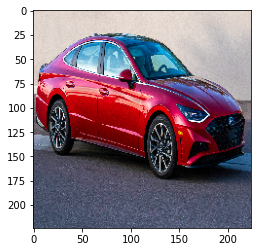

In [8]:
filename = 'images/car.jpg'
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

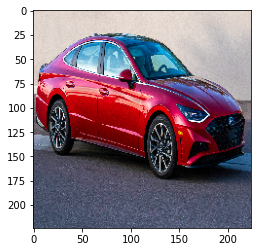

numpy array size (224, 224, 3)


In [9]:
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

image batch size (1, 224, 224, 3)


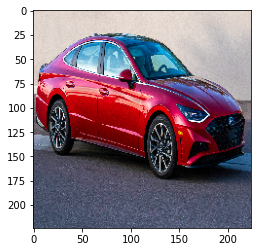

In [10]:
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [12]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
# get the predicted probabilities for each class
predictions = vgg16_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# we will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
# print VGG16 predictions
for prediction_id in range(len(label_vgg[0])):
  print(label_vgg[0][prediction_id])

40960/35363 [==================================] - 0s 0us/step
('n04285008', 'sports_car', 0.83918256)
('n02814533', 'beach_wagon', 0.08632269)
('n02974003', 'car_wheel', 0.035274576)
('n03100240', 'convertible', 0.018874027)
('n04037443', 'racer', 0.01433403)
